In [ ]:
!ls

sample_data


# Практическое задание №4

##Задание 1

Скачать датасет о качестве КРАСНОГО вина по ссылке.



In [ ]:
!wget https://github.com/krashivan/working_files/raw/main/PA2HW3/winequality-red.csv

--2021-12-27 20:22:05--  https://github.com/krashivan/working_files/raw/main/PA2HW3/winequality-red.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/krashivan/working_files/main/PA2HW3/winequality-red.csv [following]
--2021-12-27 20:22:05--  https://raw.githubusercontent.com/krashivan/working_files/main/PA2HW3/winequality-red.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84199 (82K) [text/plain]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  82.23K  --.-KB/s    in 0.01s   

2021-12-27 20:22:06 (6.15 MB/s) - ‘winequality-red.csv’ saved [84199/84199]



In [ ]:
import pandas as pd

df = pd.read_csv('winequality-red.csv', sep = ";")

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


##Задание 2

На основе переменной quality с оценками вина создать новую переменную good: если quality > 5, то 1, иначе 0

In [ ]:
df['good'] = df.apply(lambda column: 1 if column[11] > 5 else 0, axis = 1)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


##Задание 3 и 4

Исследовать, какие химические характеристики вина влияют на то, окажется оно хорошим или плохим,  с применением не менее 5 диаграмм из урока

Отчет сделать в формате storytelling: дополнить каждый график письменными выводами и наблюдениями

##Отчёт

Определим соотношение хороших и плохий вин

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data0 = df['good'].value_counts()
data0.head()

1    855
0    744
Name: good, dtype: int64

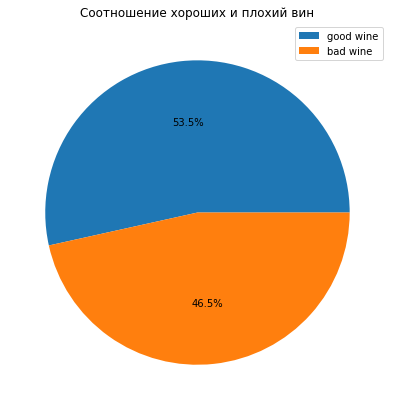

In [ ]:
plt.figure(figsize = (10,7))

plt.pie(data0, autopct='%1.1f%%')

plt.title('Соотношение хороших и плохий вин')
plt.legend(['good wine', 'bad wine'])

plt.show()

Как видно из диаграммы хороших вин больше половины, что не может не радовать.
Но всего лишь на 3%, что очень мало для преуспевающей винодельни.

------------

Определим, какие химические характеристики вина влияют на то, окажется оно хорошим или плохим. Для этого построим корреляционную матрицу.

In [ ]:
correlation = df.corr()
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.095093
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,-0.321441
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.159129
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,-0.002160
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,-0.109494
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,-0.061757
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,-0.231963
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,-0.159110
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.003264
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.218072


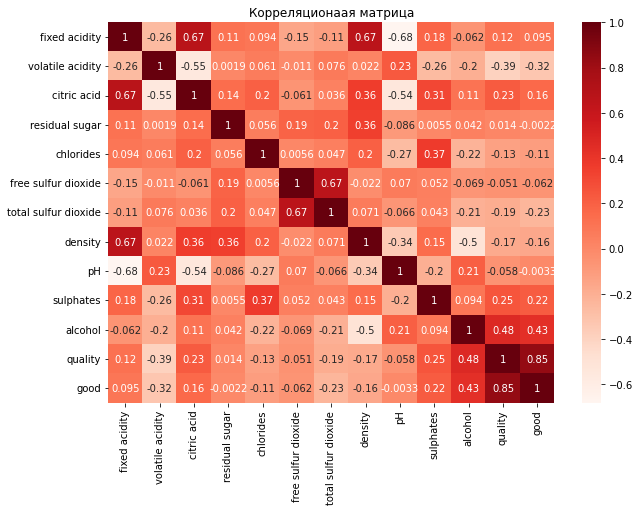

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(correlation, cmap = 'Reds', annot = True)
plt.title('Корреляционаая матрица')
plt.show()

Введем характеристику "хорошесть" вина, так как "качество" у нас уже есть и это другая, более широкая характеристика.

Как видно из корреляционной таблицы, умеренная кореляция для "хорошести" вина наблюдается с содержанием алкоголя и летучей кислотностью. Коэффициенты корреляции: 0.48 и -0.39, соответсвенно.

(Высокая корреляция "хорошести" с качетсвом вина очевидна, так как это зависимые переменные и одна искусственно задавалась через другую)

------------------------

Рассмотрим распределения велечин для пар независимых переменных: "good/alcohol" и "good/volatile acidity"

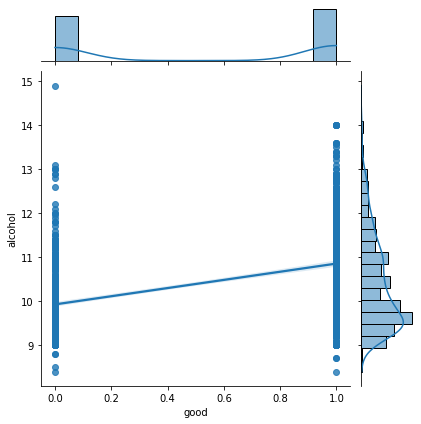

In [ ]:
sns.jointplot(x=df['good'], y=df['alcohol'], data=df, kind='reg')

Умеренная положительная коррелиция: с ростом процента алкоголя, умеренно растет "хорошесть" вина

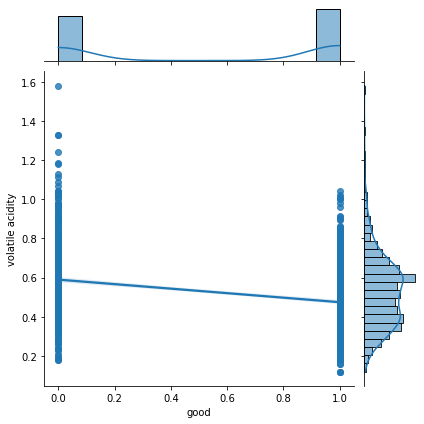

In [ ]:
sns.jointplot(x=df['good'], y=df['volatile acidity'], data=df, kind='reg')

Умеренная отрицательная коррелиция: с ростом летучей кислотности, умеренно падает "хорошесть" вина

---------------------

Рассмотрим попарные отношения переменных

In [ ]:
data = df[['good','alcohol','volatile acidity']]
data.head()

,good,alcohol,volatile acidity
0,0,9.4,0.70
1,0,9.8,0.88
2,0,9.8,0.76
3,1,9.8,0.28
4,0,9.4,0.70


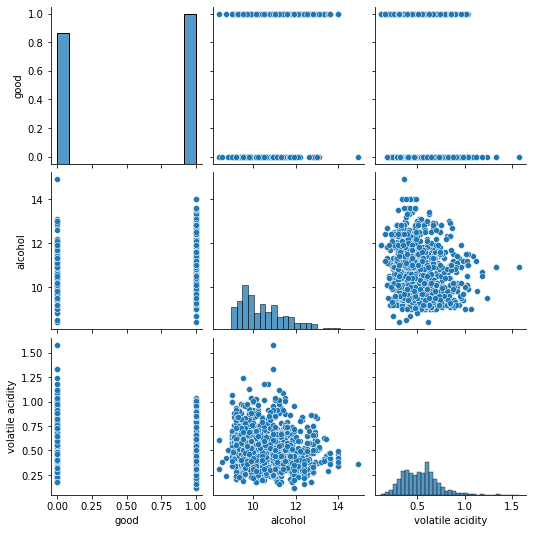

In [ ]:
sns.pairplot(data)

Наблюдаем выявленные ранее корреляции для "good/alcohol" и "good/volatile acidity". Существенной корреляции между парой alcohol/volatile acidity - не замечано.

----------------------

Составим диаграммы "Боксплот" для исследуемых переменных.

In [ ]:
data1 = df['alcohol'].loc[df['good'] == 1]
data2 = df['alcohol'].loc[df['good'] == 0]

data1.head()

3      9.8
7     10.0
8      9.5
16    10.5
19     9.2
Name: alcohol, dtype: float64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


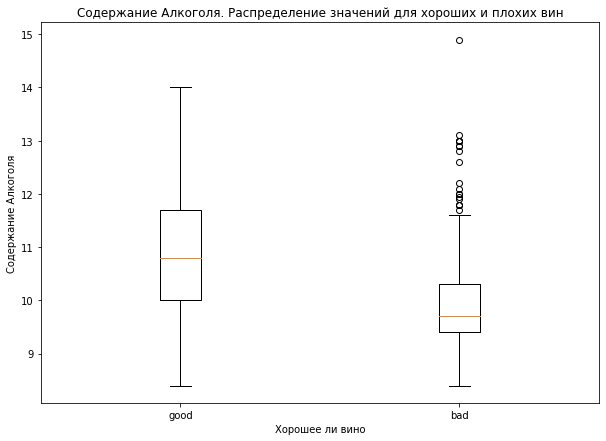

In [ ]:
plt.figure(figsize = (10,7))

plt.boxplot([data1, data2])

plt.title('Содержание Алкоголя. Распределение значений для хороших и плохих вин')
plt.xlabel('Хорошее ли вино')
plt.ylabel('Содержание Алкоголя')
plt.xticks([1, 2],['good', 'bad'])

plt.show()

In [ ]:
data3 = df['volatile acidity'].loc[df['good'] == 1]
data4 = df['volatile acidity'].loc[df['good'] == 0]

data3.head()

3     0.28
7     0.65
8     0.58
16    0.28
19    0.32
Name: volatile acidity, dtype: float64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


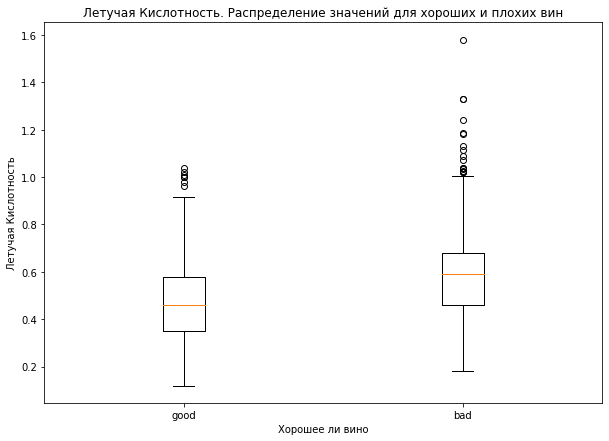

In [ ]:
plt.figure(figsize = (10,7))

plt.boxplot([data3, data4])

plt.title('Летучая Кислотность. Распределение значений для хороших и плохих вин')
plt.xlabel('Хорошее ли вино')
plt.ylabel('Летучая Кислотность')
plt.xticks([1, 2],['good', 'bad'])

plt.show()

Как мы видим, для хороших вин характерно нормальное распределение и меньшее количество "выбросов" по содержанию алкоголя и летучей кислотности. Тогда как для плохих вин распределения по содержанию алкоголя скошенно к нижнему квартилю, а по летучей кислотности к верхнему. 

Что подтверждает предположение, что в плохих винах с большей вероятностью будет понижено содержание алкоголя и повышена летучая кислотность. 

---

При попытке выявить наиболее характерную группу крепости для хороших вин (с помощью построения столбчатой многорядовой диаграммы) была замечана аномалия для вин группы крепости 9%-10%: резкий скачок количества плохих вин с этой группой крепости. Следует провести дальнейший анализ причин данной аномалии.

Характерной группы крепости для хороших вин не выявлено.


In [ ]:
df1 = df

df1['Alcohol group'] = df1.apply(lambda column: '9-10' if ((column[10] >= 9)  & (column[10] < 10)) \
                                 else ('10-11' if ((column[10] >= 10) & (column[10] < 11)) \
                                 else ('11-12' if ((column[10] >= 11) & (column[10] < 12)) \
                                 else ('12-13' if ((column[10] >= 12) & (column[10] < 13)) \
                                 else ('13-14' if ((column[10] >= 13) & (column[10] < 14)) \
                                 else ('14-15' if ((column[10] >= 14) & (column[10] < 15)) \
                                 else ()))))), axis = 1)

data5 = pd.crosstab(df1['Alcohol group'],df1['good']).reset_index().sort_values(by = 1, ascending = False)

data5.head()

good,Alcohol group,0,1
1,10-11,182,270
2,11-12,72,233
6,9-10,472,201
3,12-13,8,125
4,13-14,5,16


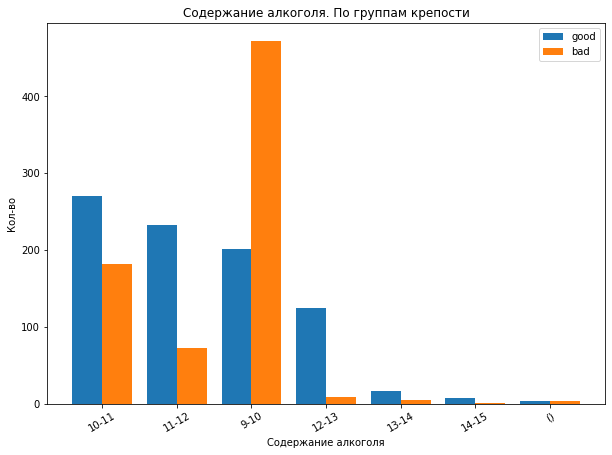

In [ ]:
plt.figure(figsize = (10,7))

import numpy as np
n_ticks = np.arange(len(data5[1]))
offset = 0.2
w = 0.4

plt.bar(n_ticks - offset, data5[1], width=w)
plt.bar(n_ticks + offset, data5[0], width=w)

plt.title('Содержание алкоголя. По группам крепости')
plt.xlabel('Содержание алкоголя')
plt.ylabel('Кол-во')
plt.legend(['good','bad'])
plt.xticks(n_ticks, data5['Alcohol group'], rotation = 30)

plt.show()